# Other Yields
A short comparison of non-carbon AGB & not CCSNe yields

In [1]:
import vice
import numpy as np

/astro/dboyea/.local/lib/python3.11/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
vice.yields.sneia.settings["c"]

5.74e-06

In [3]:
import matplotlib.pyplot as plt

In [4]:
import surp

In [24]:
surp.set_yields()

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 8.14e-01 (Z - Z0)   1.00 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





In [25]:
y_c_0 = 4.20 * vice.yields.ccsne.settings["mg"]

Text(0, 0.5, 'log y_ia / y_total')

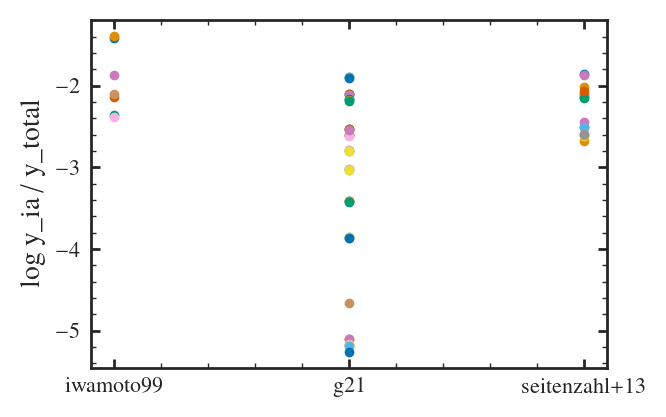

In [29]:

ys = []
for model in ['W7', 'W70', 'WDD1', 'WDD2', 'WDD3', 'CDD1', 'CDD2']:
    y = vice.yields.sneia.fractional("c", study="iwamoto99", model=model)
    ys.append(y)
    plt.scatter(0, np.log10(y / y_c_0))
    
    
for model in ['M08_03_001', 'M08_03_01', 'M08_03_1', 'M08_03_3', 'M08_05_001', 'M08_05_01', 'M08_05_1', 'M08_05_3', 'M08_10_001', 'M08_10_01', 'M08_10_1', 'M08_10_3', 'M09_03_001', 'M09_03_01', 'M09_03_1', 'M09_03_3', 'M09_05_001', 'M09_05_01', 'M09_05_1', 'M09_05_3', 'M09_10_001', 'M09_10_01', 'M09_10_1', 'M09_10_3', 'M10_02_001', 'M10_02_01', 'M10_02_1', 'M10_02_3', 'M10_03_001', 'M10_03_01', 'M10_03_1', 'M10_03_3', 'M10_05_001', 'M10_05_01', 'M10_05_1', 'M10_05_3', 'M10_10_001', 'M10_10_01', 'M10_10_1', 'M10_10_3', 'M11_05_001', 'M11_05_01', 'M11_05_1', 'M11_05_3']:
    y = vice.yields.sneia.fractional("c", study="gronow21", model=model)
    plt.scatter(1, np.log10(y / y_c_0))
    ys.append(y)

for model in ['N1', 'N3', 'N5', 'N10', 'N20', 'N40', 'N100H', 'N100', 'N100L', 'N150', 'N200', 'N300C', 'N1600', 'N1600C', 'N100_Z0.5', 'N100_Z0.1', 'N100_Z0.01']:
    y = vice.yields.sneia.fractional("c", study="seitenzahl13", model=model)
    plt.scatter(2, np.log10(y / y_c_0))
    ys.append(y)


plt.xticks([0, 1, 2], labels=["iwamoto99", "g21", "seitenzahl+13"])

plt.ylabel("log y_ia / y_total")

In [30]:
np.max(ys) / y_c_0

0.04081215433537832

In [33]:
np.max(ys) / 1e-4

1.1176000343199999

In [34]:
np.sort(ys)

array([1.51378019e-08, 1.80199911e-08, 1.83722290e-08, 1.84602073e-08,
       1.90160324e-08, 2.13932677e-08, 2.16793115e-08, 6.02885230e-08,
       3.74003459e-07, 3.76423733e-07, 3.81044149e-07, 3.83244171e-07,
       1.03334196e-06, 1.04808071e-06, 1.06150068e-06, 1.06612070e-06,
       2.54540184e-06, 2.57180037e-06, 2.61140030e-06, 2.61360031e-06,
       4.30102627e-06, 4.38020438e-06, 4.41760240e-06, 4.42420257e-06,
       5.74204048e-06, 6.61986978e-06, 6.68803828e-06, 6.73861164e-06,
       6.81120628e-06, 6.82001863e-06, 6.83540670e-06, 6.93000420e-06,
       6.95200060e-06, 7.81021570e-06, 7.96406089e-06, 8.05203751e-06,
       8.05203971e-06, 8.47004774e-06, 8.51405016e-06, 8.58004796e-06,
       9.74605654e-06, 1.11769152e-05, 1.19251132e-05, 1.79527430e-05,
       1.83702240e-05, 1.85901383e-05, 1.86121454e-05, 1.94921089e-05,
       1.97787260e-05, 1.99101111e-05, 2.02400994e-05, 2.09449600e-05,
       2.14942693e-05, 2.17361639e-05, 2.17581719e-05, 2.17801353e-05,
      

# Nitrogen AGB

In [34]:

def plot_n_table(study = "cristallo11", ax=None, fig=None, factor=1e2, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()

    y1, m1, z1 = vice.yields.agb.grid('n', study=study)
    N = len(z1)

    for i in range(N):
        y = np.array(y1)[:,i] * factor
        z = z1[i] 
        c = hmap(np.log10(z/0.014))
        f = ax.plot(m1, y, "o", label=f"Z = {z}", c=(c), **kwargs)
        f = ax.plot(m1, y, label=f"Z = {z}", c=(c), **kwargs)
        # ax.set_xticks(np.arange(1, 8))
    
    ax.axhline(0, color="k", ls=":", zorder=-1)

    return f

Text(0, 0.5, '$y_{\\rm N}$ --- R18')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


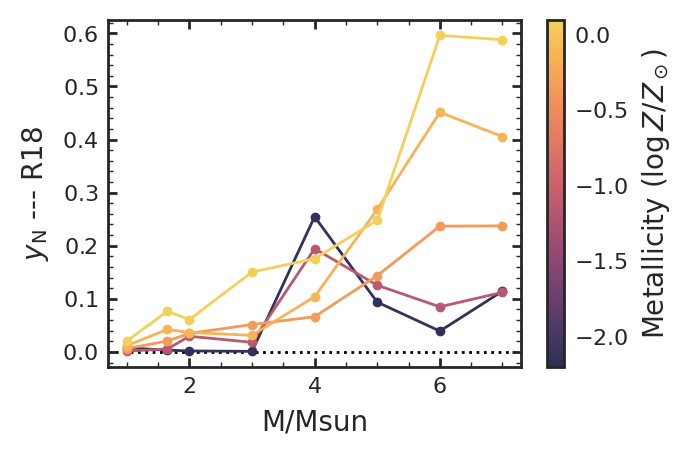

In [35]:
plot_n_table("pignatari16")
arya.Colorbar(huemap=hmap, ax=plt.gca(), label=r"Metallicity ($\log Z/Z_\odot$)")
plt.xlabel("M/Msun")
plt.ylabel(r"$y_{\rm N}$ --- R18")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   3.69e-03 MH^2 + 1.96e-03 MH +  1.45 × cristallo11             0.00e+00                       
                    2.20e-03                                                                                     

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


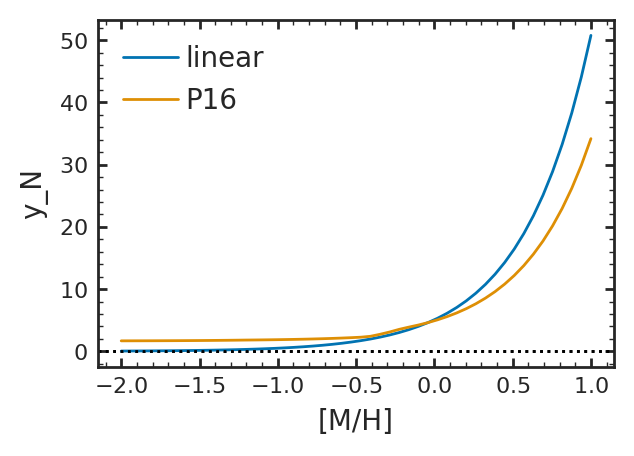

In [36]:
yields.set_yields()
Z = MH_to_Z(np.linspace(-2, 1))

plot_y_z(Z, ele="n", label="linear");

y_agb["n"] = "pignatari16"

plot_y_z(Z, ele="n", label="P16");
plt.xlabel("[M/H]")
plt.ylabel("y_N")

plt.legend()
plt.savefig("figures/_y_n_z.pdf")

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


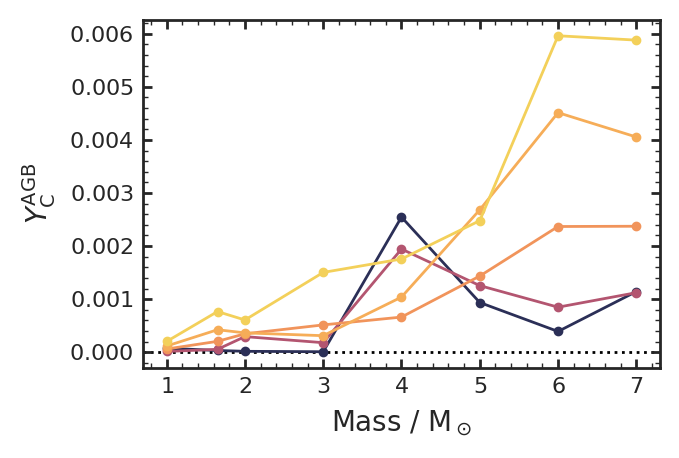

In [37]:
plot_yield_table("pignatari16", ele="n", fmt="o-")
